In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Building blocks of Regression Diagnostics

The 2 basic components of usual regression diagnostics are:
1. Fitted Values
2. Residuals

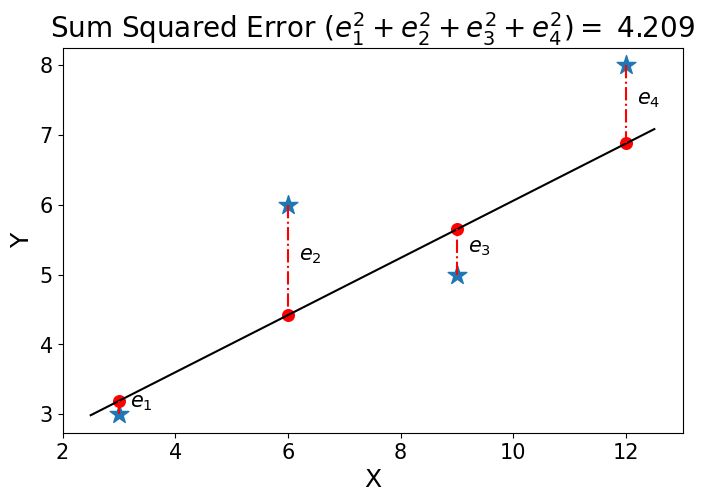

In [2]:
x = np.array([3, 6, 9, 12])
y = np.array([3, 6, 5, 8])

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,marker = '*',s = 200)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('X',size = 18)
plt.ylabel('Y',size = 18)
xx = np.linspace(x.min()-0.5,x.max()+0.5,100)
yy = 0.41*xx + 1.96
plt.plot(xx,yy,color = 'k')

pred_yy = 0.41*x + 1.96
summ = 0
for j in range(len(x)):
    xx = [x[j],x[j]]
    yy = [y[j],pred_yy[j]]
    ax.plot(xx,yy,color = 'r',linestyle = '-.')
    ax.scatter(x[j],pred_yy[j],color = 'r',s = 70)
    s = (y[j]-pred_yy[j])/2
    summ = summ + (s*2)**2
    plt.text(x[j]+0.2,y[j]-s,f'$e_{j+1}$',size = 15)
plt.title(f'Sum Squared Error $(e_1^2+e_2^2+e_3^2+e_4^2) = $ {np.round(summ,3)}',size = 20)
plt.show()

Hence for analyzing the quality of the above straight line fit, we analyze the following two quantities:
1. Big red dots representing the fitted values or the predictions (we look at Hat matrix H)
2. $e_1,e_2,e_3,e_4$ or the residuals (we look at residual vector e)

## 1.1 Building the Hat matrix: H

Assuming, we again have observations $(x_1,y_1), (x_2, y_2), (x_3, y_3),..,(x_n,y_n)$. Depending on the type of linear model we are fitting, we can formulate the $X$, $Y$ and $\beta$ matrices and fit the general form:

$$Y = X\beta + \epsilon, \quad \epsilon \sim N(0,\sigma^2I) \tag{1}$$

Please note, from the properties of Gaussian/Normal distribution, an alternate model defintion for the same model can be

$$ Y \sim N(X\beta, \sigma^2I)$$

Like before, assuming $\hat{\beta}$ represents the optimal estimate of $\beta$ when we have matrices $X$,$Y$ and fitting model of the form (1):

$$\hat{\beta} = (X^TX)^{-1}X^TY$$

Hence, now we can represent the predictions at original x-locations $(x_1,x_2,..x_n)$ as follows

$$\hat{Y} = X \hat{\beta} = X(X^TX)^{-1}X^TY = HY \tag{2}$$

Here, $\hat{Y} = [\hat{y}_1, \hat{y}_2,..,\hat{y}_n]$ is the prediction and $X$ is the original design matrix formulated at the original x-locations. From (2), we now have the definition for the $\textbf{hat matrix}: H$

\begin{align}
\boxed{
H = X(X^TX)^{-1}X^T} \tag{3}
\end{align}

Hence, essentially $H$ is a linear operator that transforms $Y$ to $\hat{Y}$

$$H: Y \to \hat{Y}\\ \hat{Y} =  HY$$

## 1.2 Building the residual vector: E

At any data location $x_i$, the error in prediction or the residual is represented as

$$e_i = y_i - \hat{y}_i$$

Representing the errror in prediction at all n locations in a vector form:

$$e = \begin{bmatrix}e_1 \\e_2\\ \vdots \\ e_n \end{bmatrix}
 = \begin{bmatrix}y_1 - \hat{y}_1 \\y_2 - \hat{y}_2\\ \vdots \\ y_n - \hat{y}_n \end{bmatrix}
 = \begin{bmatrix}y_1 \\y_2 \\ \vdots \\ y_n \end{bmatrix}  
 - \begin{bmatrix} \hat{y}_1 \\ \hat{y}_2\\ \vdots \\ \hat{y}_n \end{bmatrix}
 = Y - \hat{Y}
 = Y - HY
 = (I-H)Y
\tag{4}
$$

## 1.3 Estimating observational noise

We will directly use the unbiased estimator of noise variance given as:

$$\hat{\sigma}^2 \equiv \frac{||Y - \hat{Y}||_2^2}{n-p} = \frac{||(I - H)Y||_2^2}{n-p}$$

where n is the number of samples and p is the number of parameters in the model. For example for if we are considering a model of the general form $y = \beta_0 + \beta_1x + \beta_2x^2+...+ \beta_m x^m$, then $p = m+1$

## 2.1 Checking model validity: Studentized Residual

Before moving forward please note:
$$H^T = (X(X^TX)^{-1}X^T)^T = X((X^TX)^{-1})^TX^T = X(X^TX)^{-1}X^T = H \tag{5}$$
$$H^2 = (X(X^TX)^{-1}X^T)^2 = X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T = H \tag{6}$$



Hence we have:
\begin{align}
Cov(e) &= Cov((I-H)Y)\\
&= (I-H) Cov(y) (I-H)^T\\
& = \sigma^2(I-H)(I-H)^T, \quad (\text{Since}\ Y \sim N(X\beta, \sigma^2I))\\
&= \sigma^2(I - H - H^T + HH^T)\\
&= \sigma^2(I-H), \quad (\text{Since}\ H^T = H,\ and\ H^2 =H)
\end{align}

Therefore,

$$\widehat{st.dev}(e_i) = \hat{\sigma}\sqrt{1 - (i^{th}\text{ diagonal entry of H})} = \hat{\sigma}\sqrt{1 - H_{ii}}$$

Here $\widehat{st.dev}(e_i)$ denoted estimated standard deviation of residual $e_i$ and $\hat{\sigma}^2$ represents an estimate of the noise ($\epsilon$) variance of the observations $y_i$. $i^{th}$ studentized residual is then:

$$e_i^{*} \equiv \frac{e_i}{\widehat{st.dev}(e_i)}  = \frac{e_i}{\hat{\sigma}\sqrt{1 - H_{ii}}} \tag{7}$$

which under normality and homoscedasticity, should behave like a $N(0,1)$ sample when the model is correct.

Hence if all studentized residuals lie in the interval $\textbf{[-3,3] (3 standard deviation or 99.7% of prabability mass)}$ and at max just a few lie outside $\textbf{[-2,2] (2 standard deviation or 95% of the probability mass)}$, then the model can be assumed to be valid with no outliers

<function matplotlib.pyplot.show(close=None, block=None)>

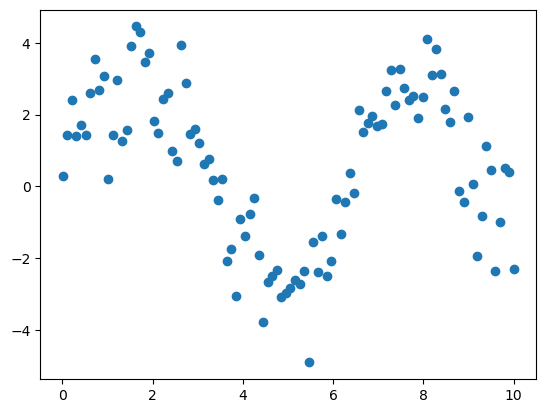

In [3]:
#practice problem
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.01,10,100)
y = np.sin(x)*3 + np.random.normal(size = [100, ])
plt.scatter(x,y)
plt.show

In [9]:
n = 100
p = 3
X = np.array([[i**0,i**1,i**2] for i in x])
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([ 3.0324434 , -1.18806712,  0.1060399 ])

<function matplotlib.pyplot.show(close=None, block=None)>

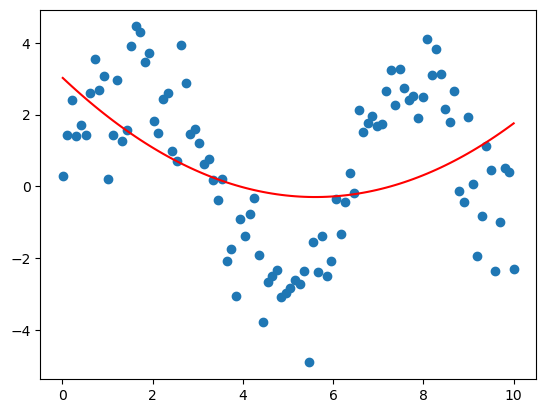

In [14]:
ypred = X.dot(beta)
ypred
plt.scatter(x,y)
plt.plot(x,ypred, color = 'r')
plt.show

In [15]:
e = y - ypred
sigmahat = np.sqrt(np.linalg.norm(e)**2/(n-p))
sigmahat

2.0204613860862755

In [16]:
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
H.shape

(100, 100)

In [17]:
diagH = np.diag(H)
diagH.shape

(100,)

In [22]:
eistar = e/(sigmahat*np.sqrt(1 - diagH))
eistar.shape

(100,)

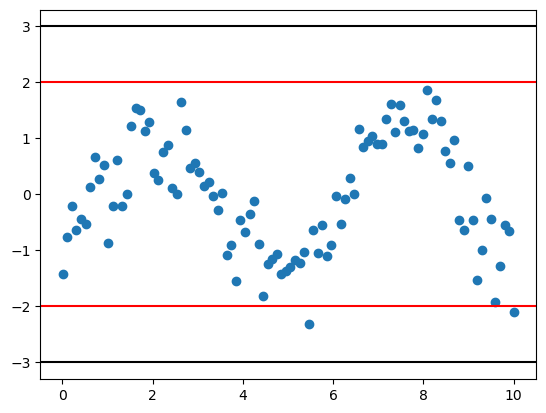

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
## this is a bad model because it should not show it's original structure
plt.scatter(x,eistar)
plt.axhline(y = -2, color = 'r')
plt.axhline(y = 2, color = 'r')
plt.axhline(y = -3, color = 'k')
plt.axhline(y = 3, color = 'k')
plt.show()

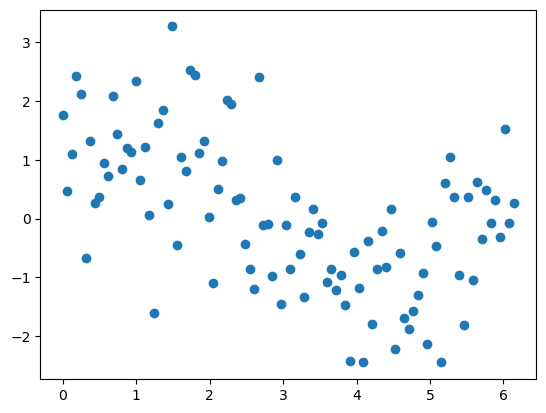

In [3]:
np.random.seed(0)
x = np.linspace(0,6.14,100)
y = np.sin(x)
err = np.random.randn(len(x))
y_noisy = y+err
plt.scatter(x,y_noisy)
plt.show()

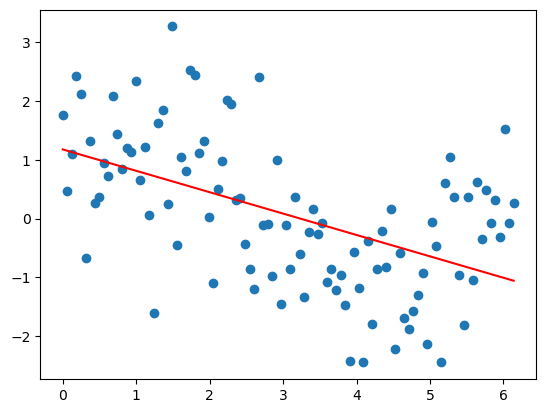

In [4]:
## Trying to fit a straight line
X = np.concatenate((np.ones(len(x)).reshape(-1,1),x.reshape(-1,1)),axis = 1)
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y_noisy))
## Predicting at same x locations

pred = X.dot(beta)
## plotting the prediction
plt.plot(X[:,1],pred,color = 'r')
plt.scatter(X[:,1],y_noisy)
plt.show()

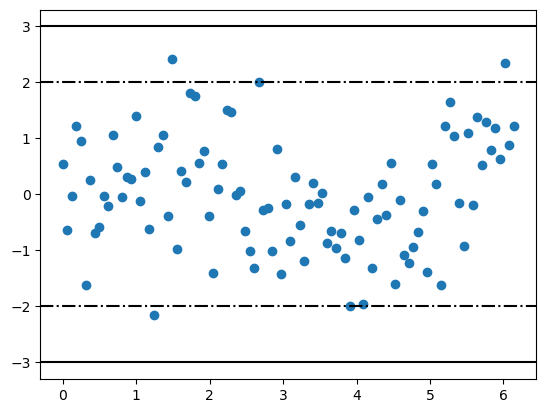

In [5]:
## Visualizing the variation of standardized residuals
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
hii = np.diag(H)
e = y_noisy - pred
var = np.linalg.norm(e)**2/(len(y_noisy) - 2)
std = np.sqrt(var)
student_t = e/(std*np.sqrt(1-hii))
plt.scatter(x,student_t)
plt.axhline(y = 3,color = 'k')
plt.axhline(y = -3, color = 'k')
plt.axhline(y = 2,linestyle = '-.',color = 'k')
plt.axhline(y = -2,linestyle = '-.', color = 'k')
plt.show()

### <mark style="background-color: #FFFF00">Exercise</mark> 

1. What can you say about the plot of studentized residuals in the above figure.

## 2.2 Checking outliers: Cooke's distance

Let $\hat{Y}$ and $\hat{Y}_i$, be respectively the vector of fitted values using all data and when the $i^{th}$ observation is deleted. Like before, let $p$ be the number of parameters in the model, then Cook's Distance (D) is defined as

$$
D_i = \frac{||\hat{Y} - \hat{Y}_i||_2^2}{p\hat{\sigma}^2} = \frac{(e_i^{*})^2H_{ii}}{p(1 - H_{ii})}
$$

D_i for any sample i would be considerably larger than for other samples if it is an outlier.

In [6]:
#cooke's on the edgepoints you don't know what's happening after the information stops on the plot. 
D = (e**2)*hii/(2*(1 - hii))

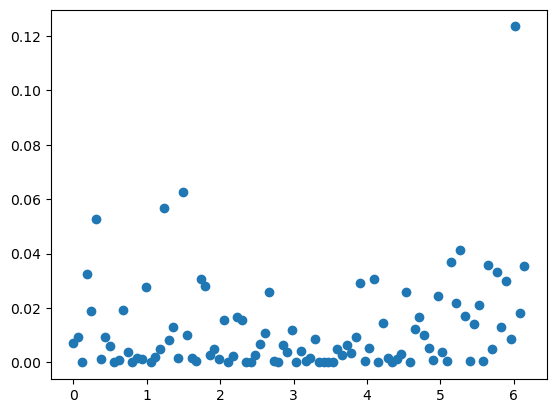

In [7]:
plt.scatter(x,D)
plt.show()

### <mark style="background-color: #FFFF00">Exercise</mark> 

1. Which points do you think are outliers from the above plot ?
2. Make another plot where you do a scatterplot of the original data (y_noisy) and highlight those points for which the cooke's distance is more than 0.05.

## 2.3 Checking independence of error: Autocorrelation

One the biggest underlying assumption in a linear regression model is that the errors are independent or atleast uncorrelated. When this assumption fails to hold then the linear regression model can be quite inefficient. For this we use the Autocorrelation function of the residuals

The $k^{th}$ lag sample autocorrelation, denoted $\hat{\rho}(k)$, is the sample correlation between $e_i$ and $e_{i-k}$, where $k+1 \leq i \leq n$. For example,the lag-1 autocorrelation measures the correlation between adjacent residuals. For general $k = 0, 1, . . . , n − 1,$

$$
\hat{\rho}(k) = \frac{\sum_{i=1}^{n-k}e_ie_{i-k}}{\sum_{i=1}^n e_i^2}
$$

If the errors are independent, then $\hat{\rho}(k)$ is approximately normally distributed with mean $0$ and variance $1/n$. Thus again one should look for $|\hat{\rho}(k)|$ values that are larger than $2/\sqrt{n}$ because that would represent 95% confidence limits under the normality assumption.

One should usually focus on short term correlations (k = 1, 2 etc) and see if they have large values. Other lags to focus on are dependent on data domain. For example, for monthly data it is important to look at autocorrelation at a lag of 12. 


### <mark style="background-color: #FFFF00">Exercise</mark> 

1. Write the code for computing autocorrelation for the residuals of the straight line on the sine data from previous exercises. Plot $|\hat{\rho}(k)|$ vs $k$ for $k = 0,1,2...,n-1$.
2. Explain what you see in the above code.